Dataset Preview:
     X        Y
0  9.1  0.99523
1  8.0  0.99007
2  9.1  0.99769
3  8.4  0.99386
4  6.9  0.99508
Converged at iteration 11

Final Parameters: [0.99637678 0.00133987]
Final Cost Value: 1.3131948455078304e-06

Advantages of averaging the cost function:
1. The cost becomes normalized across datasets, making it easier to compare.
2. It prevents high values for the cost function on large datasets.
3. It simplifies computations during optimization.
4. The results align well with statistical methods like mean squared error.



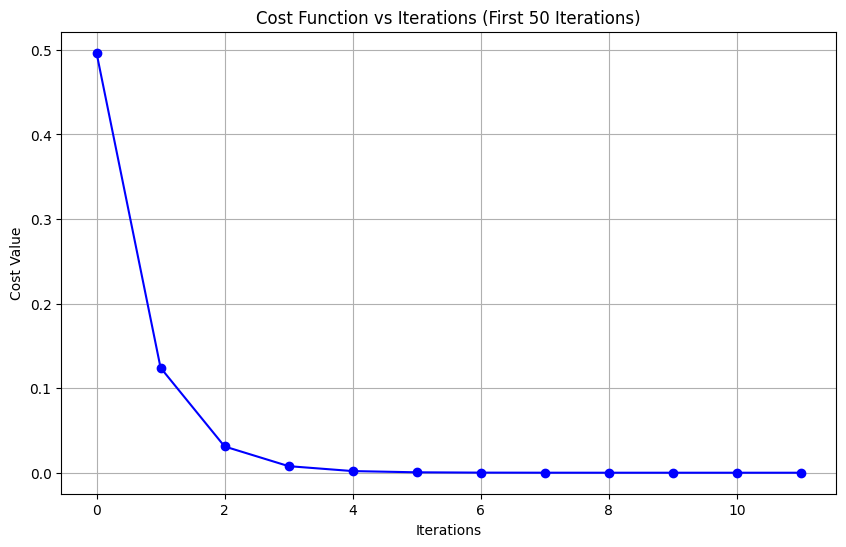

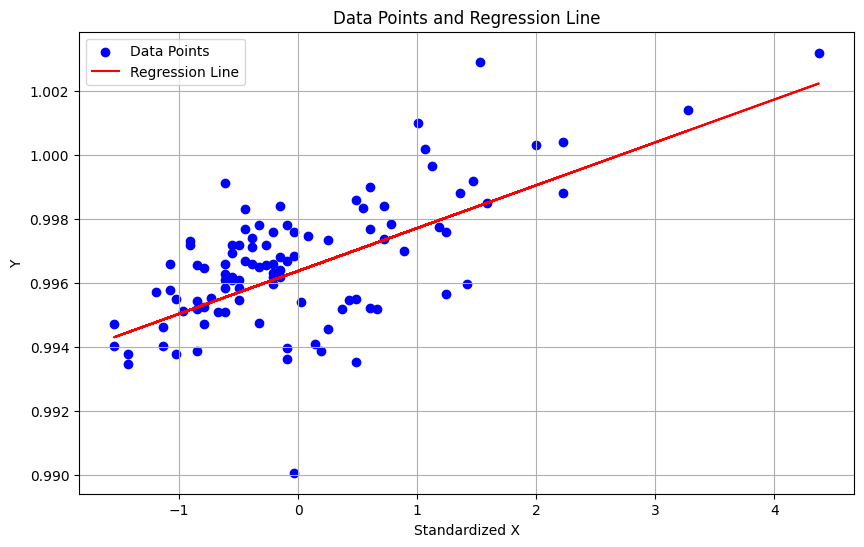


Testing Learning Rate: 0.005


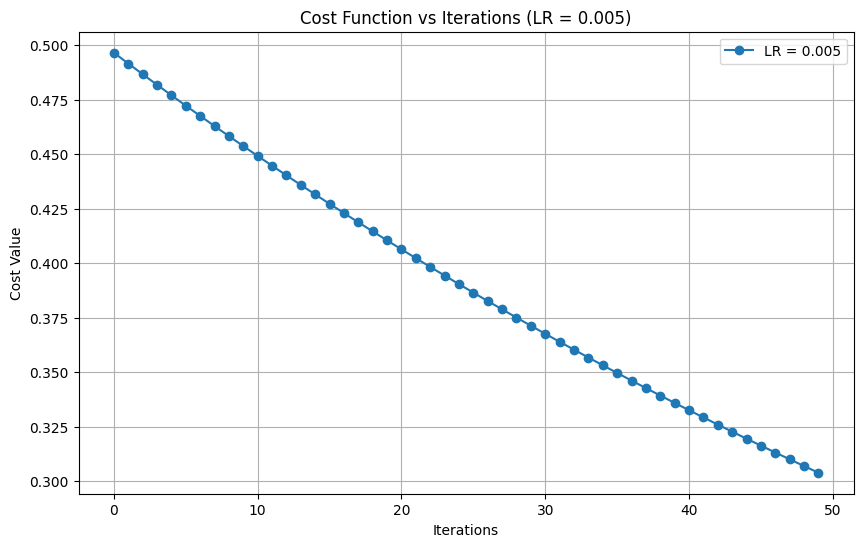

Final Weights for LR = 0.005: [0.22093816 0.0002971 ]
Final Cost Value for LR = 0.005: 0.30387410592239167

Testing Learning Rate: 0.5
Converged at iteration 11


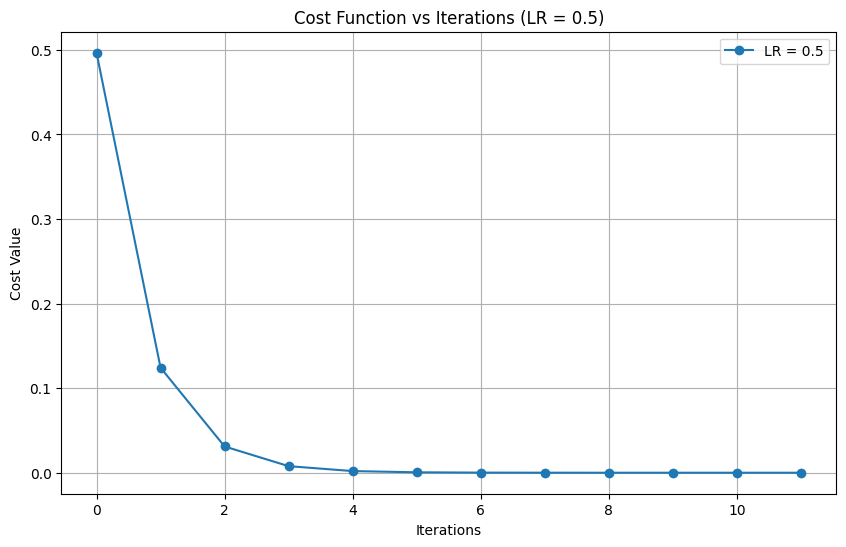

Final Weights for LR = 0.5: [0.99637678 0.00133987]
Final Cost Value for LR = 0.5: 1.3131948455078304e-06

Testing Learning Rate: 5


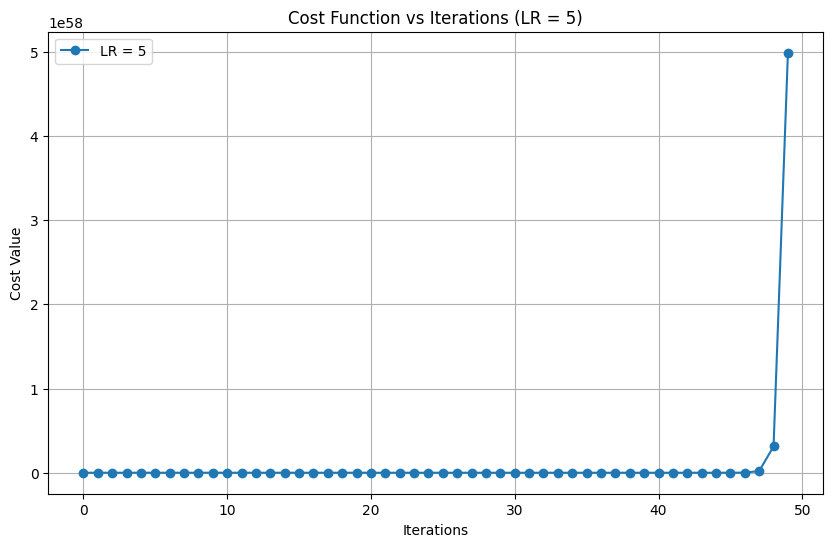

Final Weights for LR = 5: [-1.26336607e+30 -1.69890029e+27]
Final Cost Value for LR = 5: 4.987802212332242e+58


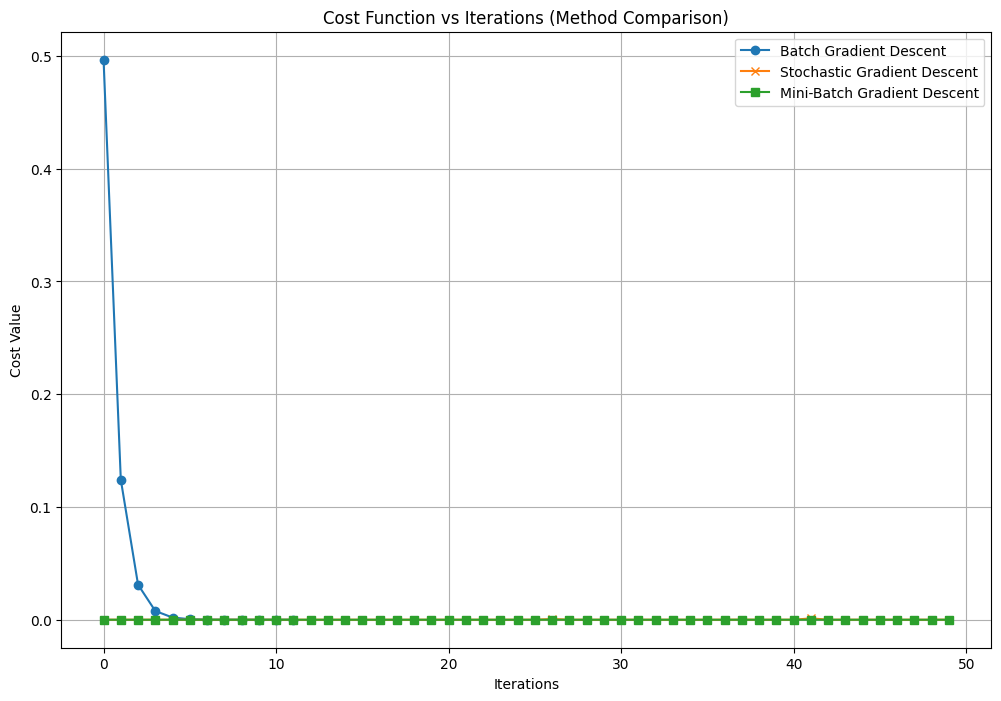

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv("Predict2.csv")
print("Dataset Preview:")
print(dataset.head())

# Normalize the input feature
def standardize(data):
    return (data - np.mean(data)) / np.std(data)

# Extract and normalize data
X_raw = dataset['X']
Y_raw = dataset['Y']
X_scaled = standardize(X_raw)
Y_values = np.array(Y_raw)
X_scaled = np.array(X_scaled)
X_with_intercept = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Function for batch gradient descent with convergence criteria
def gradient_descent_batch(data, target, alpha, max_iter, convergence_threshold=1e-6):
    num_samples, num_features = data.shape
    weights = np.zeros(num_features)
    cost_trace = []
    previous_cost = float('inf')

    for iteration in range(max_iter):
        predictions = np.dot(data, weights)
        residuals = predictions - target
        gradients = (1 / num_samples) * np.dot(data.T, residuals)
        weights -= alpha * gradients
        cost = (1 / (2 * num_samples)) * np.sum(residuals ** 2)
        cost_trace.append(cost)

        if abs(previous_cost - cost) < convergence_threshold:
            print(f"Converged at iteration {iteration}")
            break
        previous_cost = cost

    return weights, cost_trace

# Linear Regression - Learning Rate: 0.5
alpha = 0.5
max_iterations = 100
tolerance = 1e-6
final_weights, cost_over_time = gradient_descent_batch(
    X_with_intercept, Y_values, alpha, max_iterations, tolerance
)

print("\nFinal Parameters:", final_weights)
print("Final Cost Value:", cost_over_time[-1])

# Advantages of averaging the cost function
advantage_statement = """
Advantages of averaging the cost function:
1. The cost becomes normalized across datasets, making it easier to compare.
2. It prevents high values for the cost function on large datasets.
3. It simplifies computations during optimization.
4. The results align well with statistical methods like mean squared error.
"""
print(advantage_statement)

# Plot 1: Cost Function vs Iterations (First 50 Iterations)
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_over_time)), cost_over_time, marker='o', color='blue')
plt.title("Cost Function vs Iterations (First 50 Iterations)")
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.grid()
plt.show()

# Plot 2: Data Points and Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, Y_values, color='blue', label='Data Points')
best_fit_line = final_weights[0] + final_weights[1] * X_scaled
plt.plot(X_scaled, best_fit_line, color='red', label='Regression Line')
plt.title("Data Points and Regression Line")
plt.xlabel("Standardized X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

# Experiment with Different Learning Rates
learning_rates = [0.005, 0.5, 5]
max_iterations = 50

for lr in learning_rates:
    print(f"\nTesting Learning Rate: {lr}")
    weights, cost_trace = gradient_descent_batch(X_with_intercept, Y_values, lr, max_iterations)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(cost_trace)), cost_trace, marker='o', linestyle='-', label=f"LR = {lr}")
    plt.title(f"Cost Function vs Iterations (LR = {lr})")
    plt.xlabel("Iterations")
    plt.ylabel("Cost Value")
    plt.grid()
    plt.legend()
    plt.show()
    
    print(f"Final Weights for LR = {lr}: {weights}")
    print(f"Final Cost Value for LR = {lr}: {cost_trace[-1]}")

# Stochastic Gradient Descent
def sgd(data, target, alpha, max_iter):
    num_samples, num_features = data.shape
    weights = np.zeros(num_features)
    cost_trace = []

    for _ in range(max_iter):
        for i in range(num_samples):
            idx = np.random.randint(num_samples)
            single_sample = data[idx:idx + 1]
            single_target = target[idx:idx + 1]
            prediction = np.dot(single_sample, weights)
            error = prediction - single_target
            gradient = np.dot(single_sample.T, error)
            weights -= alpha * gradient
        
        cost = (1 / (2 * num_samples)) * np.sum((np.dot(data, weights) - target) ** 2)
        cost_trace.append(cost)

    return weights, cost_trace

# Mini-Batch Gradient Descent
def mini_batch_gd(data, target, alpha, max_iter, batch_size):
    num_samples, num_features = data.shape
    weights = np.zeros(num_features)
    cost_trace = []

    for _ in range(max_iter):
        indices = np.random.permutation(num_samples)
        data_shuffled = data[indices]
        target_shuffled = target[indices]

        for start in range(0, num_samples, batch_size):
            end = start + batch_size
            data_batch = data_shuffled[start:end]
            target_batch = target_shuffled[start:end]

            predictions = np.dot(data_batch, weights)
            residuals = predictions - target_batch
            gradients = (1 / batch_size) * np.dot(data_batch.T, residuals)
            weights -= alpha * gradients
        
        cost = (1 / (2 * num_samples)) * np.sum((np.dot(data, weights) - target) ** 2)
        cost_trace.append(cost)

    return weights, cost_trace

batch_size = 10
weights_sgd, cost_sgd = sgd(X_with_intercept, Y_values, alpha, max_iterations)
weights_mbgd, cost_mbgd = mini_batch_gd(X_with_intercept, Y_values, alpha, max_iterations, batch_size)

# Plot 3: Comparison of Batch, SGD, and Mini-Batch
plt.figure(figsize=(12, 8))
plt.plot(range(len(cost_over_time)), cost_over_time, label="Batch Gradient Descent", marker='o')
plt.plot(range(len(cost_sgd)), cost_sgd, label="Stochastic Gradient Descent", marker='x')
plt.plot(range(len(cost_mbgd)), cost_mbgd, label="Mini-Batch Gradient Descent", marker='s')
plt.title("Cost Function vs Iterations (Method Comparison)")
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.legend()
plt.grid()
plt.show()